In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib as pl
%matplotlib inline
def show(img):
    pl.pyplot.imshow(img,cmap=pl.cm.gray)
def show2(img):
    cv2.imshow("source",img)
    cv2.waitKey(0)
def px(x):
    pl.pyplot.plot(x)

In [506]:
delta = img.max() - img.min()
maxn = img.max() - 0.3 * delta 
minn = img.min() + 0.3 * delta
print minn
print delta

115.6
172


In [930]:
i2 = 74

In [2]:
i2 = 121
for x in range(0,1):
    img = cv2.resize(cv2.imread("pic\\%04d.jpg" % i2),(220,70))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(3,3),0)
    print img.max()
    def bright_enhancement(img):
        delta = img.max() - img.min()
        maxn = img.max() - 0.35 * delta 
        minn = img.min() + 0.35 * delta
        def bright_enhancement_point(x):
            if x >= maxn:
                return int(x * 1.75) if int(x*1.75) <= 255 else 255
            elif x <= minn:
                return int(x * 0.25)
            else:
                return x
        img2 = map(lambda x:map(bright_enhancement_point,x),img)
        tmp,img2 = cv2.threshold(np.uint8(img2),img[50:150,20:40].mean()*1.1,255,cv2.THRESH_BINARY)
        return img2
    img3 = bright_enhancement(img)
    cv2.drawContours()

164


TypeError: Required argument 'image' (pos 1) not found

In [938]:
i2

81

In [607]:
def char_split(img,cannymin=50):
    img = cv2.resize(cv2.imread("pic\\%04d.jpg" % img),(220,70))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(3,3),0)
    def bright_enhancement(img):
        delta = img.max() - img.min()
        maxn = img.max() - 0.4 * delta 
        minn = img.min() + 0.4 * delta
        def bright_enhancement_point(x):
            if x >= maxn:
                return int(x * 1.75) if int(x*1.75) <= 255 else 255
            elif x <= minn:
                return int(x * 0.25)
            else:
                return x
        img2 = map(lambda x:map(bright_enhancement_point,x),img)
        tmp,img2 = cv2.threshold(np.uint8(img2),img[50:150,20:40].mean()*0.7,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        return img2
    def getRect(x):
        ll = 99999
        uu = 99999
        dd = -1
        rr = -1
        for y in x:
            if y[0][0]<ll:
                ll = y[0][0]
            if y[0][1]<uu:
                uu = y[0][1]
            if y[0][0]>rr:
                rr = y[0][0]
            if y[0][1]>dd:
                dd = y[0][1]
        return ll,uu,rr-ll,dd-uu


    def cut_bound(img2):
        def check_link(_): 
            # Remove the upper bound and lower bound
            # According to the vally number and white point number         
            line = img2[_]
            cnt = 0
            last = line[0]
            tmp = 0
            tt = 0
            lenn = -1
            for x in line:
                if x != 0:
                    tmp = tmp +1
                    tt = tt+1
                    lenn = max(tt,lenn)
                if x != last:
                    last = x
                    if x == 0:
                        cnt= cnt+1
                    tt = 0

            return cnt < 7 or tmp <= 40 or lenn >= 32 # bound value
        tu = 0
        td = len(img2)-1
        while tu <= td and (check_link(tu) or check_link(tu+1)):
            tu=tu+1
        while td>=0 and (check_link(td)or check_link(td-1)):
            td=td-1
        tu = min(12,tu)
        td = max(len(img2)-12,td)
        print td
        img2[:tu,:]=0
        img2[td:,:]=0
        
        contours, hierarchy,_ = cv2.findContours(img2.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        rect2 = map(getRect,hierarchy)
        tmp = filter(lambda x:x[2]*x[3]>=100,rect2)
        print len(tmp)
        
        return img2
    img9 = bright_enhancement(img)
    show(img9)
    img11 = img9.copy()
    img2 = cut_bound(img9)
    edges = img2
    # edges = cv2.Canny(img2,cannymin,2.5*cannymin)
    # edges = cv2.Sobel(img2, -1, 1, 1)
    contours, hierarchy,_ = cv2.findContours(edges.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    #print len(hierarchy)
    from copy import deepcopy
    rect2 = map(getRect,hierarchy)
    
    def cmp2(x,y):
         if x[2]*x[3]<y[2]*y[3]:
            return 1
         elif x[2]*x[3]>y[2]*y[3]:
            return -1
         else:
            return 0
    rect2.sort(cmp=cmp2)
    recttmp = rect2[:7]
    def cmp3(x,y):
        return 1 if x[0]<y[0] else -1 if x[0]>y[0] else 0
    recttmp.sort(cmp=cmp3)
    lval = recttmp[-1][0]
    
    def left_trick(rect):
        rr = -1
        dd = -1
        ll = 99999
        uu = 99999
        for x in rect:
            if x[0] + x[2] <= lval:
                if x[1]+x[3] >rr:
                    rr = x[1]+x[3]
                if x[0]+x[2]>dd:
                    dd = x[0]+x[2]
                if x[1] <ll:
                    ll = x[1]
                if x[0]<uu:
                    uu = x[0]
        rect = filter(lambda x: x[0] + x[2] >= lval,rect2)
        rect.append((uu,ll,dd-uu,rr-ll))
        return rect
    
    rect10 = deepcopy(rect2)
    rect2 = left_trick(rect2)
    rect2 = filter(lambda x:x[0]<=300 and x[1]<=100 and x[2] <=500 and x[3] <=100,rect2)
    rect2.sort(cmp=cmp2)
   
    def pos_modify(rect):
       
        rect.sort(cmp=cmp3)
        ret = []
        for x in rect:
            ret.append((x[0]- 2 if x[0]-2>=0 else 0,
                        x[1]-5 if x[1]-5 >=0 else 0,
                        x[2]+4,x[3]+10))
        return ret
    
    def cross_check(x,y):
        if x[0] > y[0] +y[2] or x[1] > y[1] + y[3] or x[0] + x[2] < y[0] or x[1] + x[3] < y[1]:
            return 0.0
        colInt =  min(x[0]+x[2],y[0]+y[2]) - max(x[0], y[0])  
        rowInt =  min(x[1]+x[3],y[1]+y[3]) - max(x[1], y[1])  
        intersection = colInt * rowInt;  
        area1 = x[2] * x[3]
        area2 = y[2] * y[3]
        return intersection/(min(area1,area2)*1.0)
    rect3 = pos_modify(rect2[:10])
    ret = []
    tlen = len(rect3)
    for x in range(0,tlen):
        ok = True
        keep = False
        for y in range(x+1,tlen):
            if cross_check(rect3[x],rect3[y]) >= 0.8:
                ok = False
                keep = rect3[x][2] * rect3[x][3] > rect3[y][2] * rect3[y][3]
                break
        if keep or ok:
            ret.append(rect3[x])
    ret.sort(cmp=cmp2)
    ret = ret[:7]
    ret.sort(cmp=cmp3)
    #trick:::!!!
    ret[0] = (ret[0][0],ret[0][1]-3,ret[0][2],ret[0][3])
    return img,ret,img11,hierarchy

In [500]:
def test_img(i):
    img,rect3,c,d = char_split(i)
    img0 = img.copy()
    def draw_rect(x):
        cv2.rectangle(img0,(x[0],x[1]),(x[0]+x[2],x[1]+x[3]),(0,255,255))
    map(draw_rect,rect3)
    show(img0)

60
6


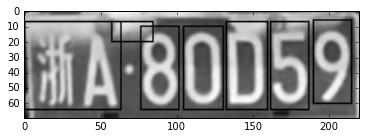

In [636]:
i0=i0+1
test_img(i0)

In [612]:
i0

102

64
6


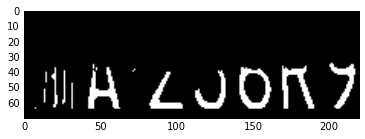

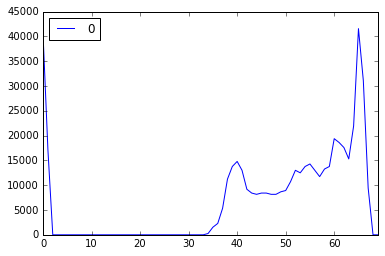

In [609]:
a,b,c,d = char_split(115,cannymin=100)
cv2.drawContours(a,d,-1,(0,255,255))
#show(c)
i0 = 100
sums = map(sum,c)
x = pd.DataFrame(sums)
x.plot()

In [183]:
i0 = 1

7


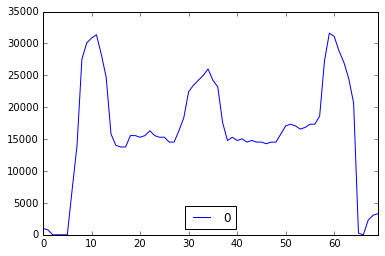

In [196]:
i0 = i0+1
a,b,c,d = char_split(i0,cannymin=100)
sums = map(sum,c)
x = pd.DataFrame(sums)
x.plot()

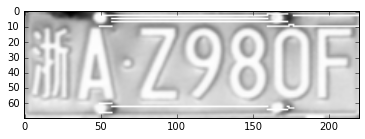

In [355]:
img2 = np.array(img2)
def find_alley(x):
    ret = []
    for _ in range(0,len(x)):
        if _ == 0 or _ == len(x) -1 or x[_] < x[_-1] and x[_] <=x[_+1] or x[_] <= x[_-1] and x[_] <x[_+1]:
            ret.append(_)
    return ret
def find_area(x):
    ret = []
    onvally = False
    saved = 0
    for _ in range(1,len(x)-1):
        if onvally and x[_] < x[_-1] and x[_] <=x[_+1]:
            onvally = False
            ret.append((saved,_))
        elif onvally == False and x[_] <= x[_-1] and x[_] < x[_+1]:
            onvally = True
            saved = _
    return ret
ver = map(sum,img2.T)
px(ver)
ver_val = find_alley(ver)
def find_pnt(x):
    ret = []
    for _ in range(1,len(ver_val)):
        block = img2[:,ver_val[_-1]:ver_val[_]]
        hoi = map(sum,block)
        hoi_val = find_area(hoi)
        for x in hoi_val:
            ret.append(( _,x[0]))
            ret.append(( _,x[1]))
    return ret
mid = find_pnt(img2)
img0 = img.copy()
for x in mid:
    cv2.line(img0,(ver_val[x[0]-1],x[1]),(ver_val[x[0]],x[1]),(255,255,255))
show(img0)
#imgtmp = np.zeros_like(img)
#for x in mid:
#    imgtmp[x[1],x[0]] = 255
#show(imgtmp)

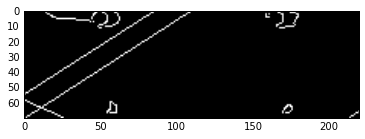

In [356]:
img3 = cv2.Canny(np.uint8(img2),100,225)
show(img3)
lines = cv2.HoughLinesP(img3, 1, np.pi/180, 10, 10, 0)
result = img3.copy()
for x in lines:
    for line in x:  
        rho = line[0] #第一个元素是距离rho  
        theta= line[1] #第二个元素是角度theta  
        # print rho  
        # print theta  
        if  (theta < (np.pi/4. )) or (theta > (3.*np.pi/4.0)): #垂直直线  
            pass
        else: #水平直线  
            # 该直线与第一列的交点  
            pt1 = (0,int(rho/np.sin(theta)))  
            #该直线与最后一列的交点  
            pt2 = (result.shape[1], int((rho-result.shape[1]*np.cos(theta))/np.sin(theta)))  
            #绘制一条直线  
            cv2.line(result, pt1, pt2, (255), 1)  
show(result)

In [357]:
img3 = cv2.Canny(np.uint8(img2),100,225)

In [358]:
lines = cv2.HoughLinesP(img3,1, np.pi/180, 40, 0, 0 )

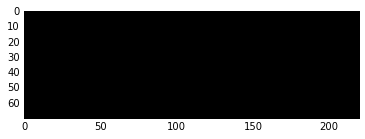

[]

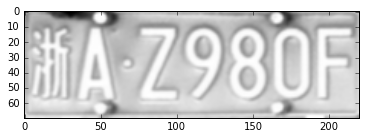

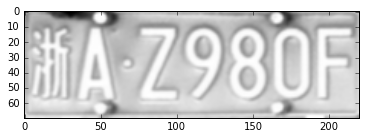